In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from dateutil.parser import parse

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Loading the test data in memory
test_df = pd.read_csv("/content/drive/MyDrive/Maersk/test_data_maersk.csv")

# Time Series Modeling and prediction for data where ***Manufacturer*** = ***X2*** and ***Product Type*** = ***Powder*** and ***Sourcing Channel*** = ***DIRECT*** 

In [4]:
# Loading the training data in memory
df = pd.read_csv("/content/drive/MyDrive/Maersk/x2_powder_direct_outlier_removed_df.csv")
df.head()

,Month of Sourcing,Sourcing Cost
0,Dec-20,12.46
1,Dec-20,64.33
2,Dec-20,16.86
3,Dec-20,27.22
4,Dec-20,12.46


In [5]:
# Converting the Month of Sourcing data from strinf to datetime format for training
df["Month of Sourcing"] = df["Month of Sourcing"].str.replace('-','-20')
df["Month of Sourcing"]= df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
df.head()

,Month of Sourcing,Sourcing Cost
0,2020-12-25,12.46
1,2020-12-25,64.33
2,2020-12-25,16.86
3,2020-12-25,27.22
4,2020-12-25,12.46


In [6]:
# Ordering the training data by Month of Sourcing (oldest to newest)
data = df
data.sort_values(by=["Month of Sourcing"])

,Month of Sourcing,Sourcing Cost
58217,2020-07-25,16.51
58844,2020-07-25,99.97
58843,2020-07-25,12.09
58842,2020-07-25,0.00
58841,2020-07-25,18.03
...,...,...
69301,2021-05-25,79.09
69300,2021-05-25,169.09
69299,2021-05-25,172.91
69313,2021-05-25,184.86


(0.0, 500.0)

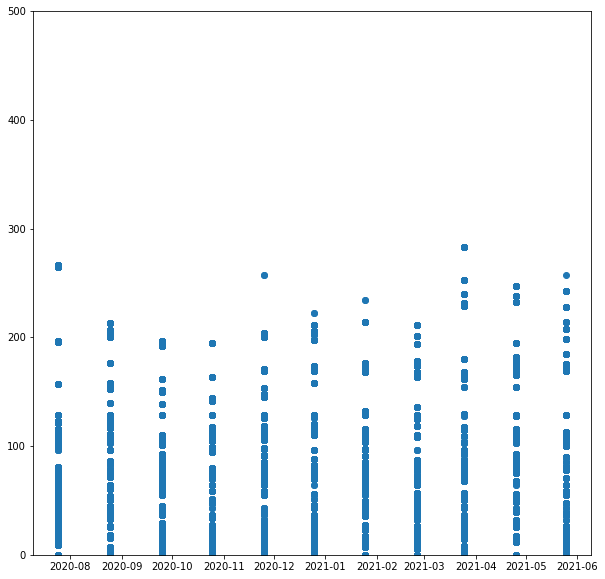

In [7]:
# Plottting the training data to visualize the scatter plot of the grouped time-series
plt.figure(figsize=(10,10))
plt.scatter(data["Month of Sourcing"], data["Sourcing Cost"])
plt.ylim((0,500))

In [8]:
# renaming the columns to symbolize the timestamp and the target
data = data.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

In [9]:
# instantiating an object of Prophet Class (Using the Prophet Forecasting model developed by Facebook)
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
# Making prediction on the filtered data
test_df = test_df[(test_df["Manufacturer"]=="X2") & (test_df["Product Type"]=="Powder") & (test_df["Sourcing Channel"]=="DIRECT") ]
test_df["Month of Sourcing"] = test_df["Month of Sourcing"].str.replace('-','-20')
test_df["Month of Sourcing"]= test_df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
test_df.reset_index(drop=True,inplace=True)
test_df = test_df.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

pred = model.predict(test_df[["ds"]])
pred = pred["yhat"].to_list()

test_df["yhat"] = pred

print(test_df)

  ProductType Manufacturer Area Code  ...         ds       y      yhat
0        NTM1           X2       A12  ... 2021-06-25   13.98  57.16098
1        NTM1           X2       A21  ... 2021-06-25   78.05  57.16098
2        NTM1           X2       A42  ... 2021-06-25  234.71  57.16098
3        NTM1           X2       A42  ... 2021-06-25  179.40  57.16098
4        NTM1           X2       A43  ... 2021-06-25  168.73  57.16098
5        NTM1           X2       A45  ... 2021-06-25   25.46  57.16098
6        NTM2           X2       A25  ... 2021-06-25   52.50  57.16098
7        NTM2           X2       A31  ... 2021-06-25    4.14  57.16098
8        NTM2           X2       A45  ... 2021-06-25   25.46  57.16098
9        NTM3           X2       A20  ... 2021-06-25   32.32  57.16098

[10 rows x 9 columns]


In [14]:
# Computing the Absolute Error in model's performance
diff_col = test_df["y"] - test_df["yhat"]
test_df["Absolute Error"] = diff_col
test_df["Absolute Error"]= test_df.apply(lambda x: abs(x["Absolute Error"]),axis=1)
print(test_df)

  ProductType Manufacturer Area Code  ...       y      yhat Absolute Error
0        NTM1           X2       A12  ...   13.98  57.16098       43.18098
1        NTM1           X2       A21  ...   78.05  57.16098       20.88902
2        NTM1           X2       A42  ...  234.71  57.16098      177.54902
3        NTM1           X2       A42  ...  179.40  57.16098      122.23902
4        NTM1           X2       A43  ...  168.73  57.16098      111.56902
5        NTM1           X2       A45  ...   25.46  57.16098       31.70098
6        NTM2           X2       A25  ...   52.50  57.16098        4.66098
7        NTM2           X2       A31  ...    4.14  57.16098       53.02098
8        NTM2           X2       A45  ...   25.46  57.16098       31.70098
9        NTM3           X2       A20  ...   32.32  57.16098       24.84098

[10 rows x 10 columns]


In [15]:
print("The mean absolute error in Sourcing Cost for this model's prediction is  " + str(test_df["Absolute Error"].mean()))

The mean absolute error in Sourcing Cost for this model's prediction is  62.13519593016933
